- 예제 1: 어느 회사에서 생산하는 제품의 모분산을 추리하기 위하여, 표본 10개를 뽑았더니 표본분산은 6.42가 나왔다고 한다. 이때 제품의 모분산에 대한 90%의 신뢰구간을 구하시오. 

In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [18]:
n=10
u_var=6.42
alpha=0.1
rv=stats.chi2(df=n-1)
lcl=(n-1)*u_var/rv.isf(alpha/2)
ucl=(n-1)*u_var/rv.isf(1-alpha/2)
lcl, ucl

(3.415099975321245, 17.37685387744868)

- 예제 2: 향수 20개 추출, 지속시간의 분산 90**2, 향수의 분산 90% 신뢰구간을 구하라

In [22]:
n=20
u_var=90**2
alpha=0.1
rv=stats.chi2(df=n-1)
lcl=(n-1)*u_var/rv.isf(alpha/2)
ucl=(n-1)*u_var/rv.isf(1-alpha/2)
lcl, ucl

(5105.573709077189, 15211.99973041214)

### 일표본T검정

In [23]:
import pandas as pd
import numpy as np
df=pd.read_csv("ch11_potato.csv")
df

,무게
0,122.02
1,131.73
2,130.60
3,131.82
4,132.05
5,126.12
6,124.43
7,132.89
8,122.79
9,129.95


In [24]:
import scipy.stats as stats
from scipy.stats import shapiro
shapiro(df['무게'])

ShapiroResult(statistic=0.9412715435028076, pvalue=0.43486055731773376)

귀무가설을 기각할 수 없다. 즉 정규성을 가정함

H0 : 감자튀김 모평균은 130이다.
    
H1 : 감자튀김 모평균은 130이 아니다.

In [25]:
mean0=130
p_var=9
s_mean=df['무게'].mean()
n=len(df['무게'])
rv=stats.norm()

- 검정통계량

In [26]:
z=(s_mean-mean0)/np.sqrt(p_var/n)
z

-1.932298779026813

In [27]:
p=rv.cdf(z)*2
p

0.05332263904625327

귀무가설을 기각할 수 없다. 즉 감자튀김 모평균은 130g이라고 할 수 있다.

In [28]:
stats.wilcoxon(df['무게']-mean0, alternative='two-sided')

WilcoxonResult(statistic=32.0, pvalue=0.216552734375)

귀무가설을 기각할 수 없다. 즉 모평균은 130이다.

In [30]:
#쉽게 구하는 방법(모분산 모르는 경우만 사용)
mean0=130
t, p=stats.ttest_1samp(df['무게'], mean0)
t, p

(-1.4551960206404198, 0.16933464230414275)

- 예제3 

H0 : 고양이의 평균 몸무게는 2.6kg이다.

H1 : 고양이의 평균 몸무게는 2.6kg가 아니다.

In [32]:
import pandas as pd
df=pd.read_csv("cats.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [34]:
from scipy.stats import shapiro
mean0=2.6
shapiro(df['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

귀무가설을 기각한다. 즉 정규분포를 따르지 않는다.

In [35]:
stats.wilcoxon(df.Bwt-mean0, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

귀무가설을 기각한다. 즉 고양이의 평균 몸무게는 2.6이 아니다.

### 대응표본 T검정

- 예제4 : 
10명 환자 대상 수면영양제 복용 전과 후의 수면시간을 측정하였다.

H0 : 복용 전과 후의 수면시간에는 차이가 없다.

H1 : 복용 전과 후의 수면시간에는 차이가 있다.

In [38]:
import pandas as pd
df={'before' : [7,3,4,5,2,1,6,6,5,4], 'after':[8,4,5,6,2,3,6,8,6,5]}
df=pd.DataFrame(df)
df

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [39]:
shapiro(df.before)

ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352707624435425)

In [40]:
shapiro(df.after)

ShapiroResult(statistic=0.9456837177276611, pvalue=0.6177994012832642)

정규분포를 가정함

In [41]:
stats.ttest_rel(df.before, df.after, alternative='two-sided')

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.001053871257016553)

귀무가설을 기각한다. 즉, 복용전후 수면시간의 차이는 있다.

### 문제1

공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서 12개 샘플을 뽑았음. 유의수준 5%에서 부호 검정하시오. 12개 샘플의 수명은 8800, 9500, 9600, 10500, 10400, 9600, 10300, 9500, 9600, 7100,10100,7200 이다
1. 연구가설 귀무가설 작성(5)

In [42]:
import pandas as pd
import numpy as np
df=pd.DataFrame({'data':[8800, 9500, 9600, 10500, 10400, 9600, 10300, 9500, 9600, 7100,10100,7200]})

- H0 : 진공관 수명은 10,000시간이다
- H1 : 진공관 수명은 10,000시간이 아니다.

In [44]:
shapiro(df.data)

ShapiroResult(statistic=0.8105747699737549, pvalue=0.012388509698212147)

귀무가설을 기각한다. 부호순위 검정을 진행한다.

1. 유효한 샘플 수 계산

부호순위 검정에서 중위수와 같은 관측치는 유효하지 않으므로 제외한다.

In [49]:
median=np.median(df.data)
median

9600.0

In [50]:
from collections import Counter
Counter(df.data)

Counter({8800: 1,
         9500: 2,
         9600: 3,
         10500: 1,
         10400: 1,
         10300: 1,
         7100: 1,
         10100: 1,
         7200: 1})

In [51]:
df=df[df['data']!=9600]

2. 검정통계량, 채택

In [58]:
mean0=10000
검정통계량, p=stats.wilcoxon(df.data-mean0, alternative='two-sided')

In [59]:
검정통계량, p

(11.0, 0.203125)

검정통계량은 11이다.

p값이 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉, 진공관 수명은 1만시간이다.

### 문제2

공장에서는 시제품의 농도가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하시오.

-귀무가설 : 시제품의 농도는 60이다.

-대립가설 : 시제품의 농도는 60이 아니다.

In [65]:
df=pd.DataFrame({'data':[52,50,62,75,26,45,62,35,57,14]})

In [66]:
shapiro(df['data'])

ShapiroResult(statistic=0.965764582157135, pvalue=0.849041759967804)

샘플이 10개 이하이므로 윌콕슨 순위합 검정을 진행한다.

- 중위수 파악

In [67]:
median=np.median(df.data)
median

51.0

In [68]:
from collections import Counter
Counter(df.data)

Counter({52: 1, 50: 1, 62: 2, 75: 1, 26: 1, 45: 1, 35: 1, 57: 1, 14: 1})

51이 없으니 그대로 진행

- 검정통계량, 채택

In [70]:
mean0=60
검정통계량, p=stats.wilcoxon(df.data-mean0, alternative='two-sided')

In [71]:
검정통계량, p

(9.5, 0.064453125)

검정통계량은 9.5, p값이 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 시제품 농도는 60이다.

### 문제3

광고횟수(X1) : 1 2 3 4 5 7 8 9 11 12

광고비(X2) : (낮음, 낮음, 낮음, 낮음, 높음, 높음, 높음, 높음, 높음, 높음) 

매출액(Y) : 15 16 17 18 20 22 24 26 28 29 

1. 광고비 변수를 가변수 처리 후 다중회귀를 수행하여 회귀계수가 유의한지 검정.

In [74]:
df=pd.DataFrame({'광고횟수':[1,2,3,4,5,7,8,9,11,12], '광고비':['낮음','낮음','낮음','낮음','높음','높음','높음','높음','높음','높음'], '매출액':[15,16,17,18,20,22,24,26,28,29]})

In [75]:
df

,광고횟수,광고비,매출액
0,1,낮음,15
1,2,낮음,16
2,3,낮음,17
3,4,낮음,18
4,5,높음,20
5,7,높음,22
6,8,높음,24
7,9,높음,26
8,11,높음,28
9,12,높음,29


In [86]:
df=pd.get_dummies(data)

In [87]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model=smf.ols(formula='매출액~광고횟수+광고비_낮음+광고비_높음', data=df)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     545.4
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           2.07e-08
Time:                        13:45:30   Log-Likelihood:                -4.6455
No. Observations:                  10   AIC:                             15.29
Df Residuals:                       7   BIC:                             16.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9551      0.294     30.473      0.000       8.260       9.650
광고횟수           1.2957      0.074     17.431      0.000       1.120       1.471
광고비_낮음         4.3058      0.189     22.786      0.000       3.859       4.753
광고비_높음         4.6493      0.396     11.747      0.000       3.713       5.585
==============================================================================
Omnibus:                        0.263   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.099
Skew:                           0.157   Prob(JB):                        0.951
Kurtosis:                       2.625   Cond. No.                     8.11e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.01e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

회귀계수는 0.05보다 작으므로 유의하다

F통계량이 0.05보다 작으므로 회귀모형도 유의하다

### 문제4

- A생산라인, B생산라인 각각에서 12개의 제품을 샘플로 뽑음
- A생산라인의 제품 평균은 5.7, 표준편차는 0.03
- B생산라인의 제품 평균은 5.6, 표준편차는 0.04
- 두 생산라인 제품의 평균 차이가 있는지 검정하시오
- 5%유의수준에서 검정, z통계량 제공(Z(0.05)=1.65), 정규성 가정

(1) 
- H0 : A,B 두 생산라인의 제품 평균은 같다.
- H1 : A,B 두 생산라인의 제품의 평균은 같지 않다.

In [89]:
mean_A=5.7
mean_B=5.6
var_A=0.03**2
var_B=0.04**2
n_A=12
n_B=12
#두집단의 표본수가 동일하므로 등분산 가정함

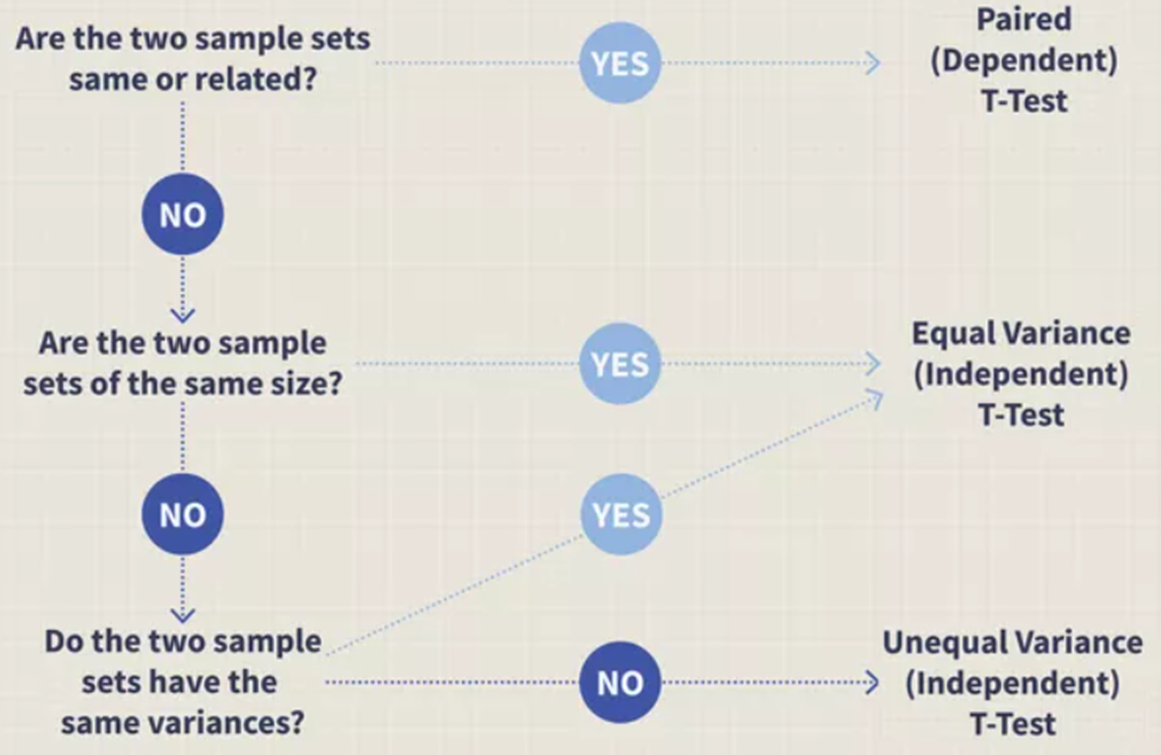

-> 표본수가 동일한 경우에는 등분산 가정 T검정을 한다는 자료가 있음

+ 위키피디아 : 1/2 < s1/s2 < 2 => 등분산

In [90]:
sp=np.sqrt(((n_A-1)*var_A+(n_B-1)*var_B)/(n_A+n_B-2))
sp

0.035355339059327376

In [93]:
t=(mean_A-mean_B)/(sp*np.sqrt(1/n_A+1/n_B))
t

6.928203230275546

In [96]:
rv=stats.t(df=n_A+n_B-2)

In [97]:
#p값
#t>0
p=(1-rv.cdf(t))*2
p

5.892973662380285e-07

p값이 0.05보다 작으므로 귀무가설을 기각한다. 즉 A, B 두 생산라인 제품의 평균은 같지 않다.

In [99]:
lcl=(mean_A-mean_B)-rv.isf(0.025)*sp*np.sqrt(1/n_A+1/n_B)
ucl=(mean_A-mean_B)-rv.isf(0.975)*sp*np.sqrt(1/n_A+1/n_B)
lcl, ucl

(0.07006622064951308, 0.12993377935048797)

신뢰구간이 0을 포함하지 않으므로 기각한다.

### 문제5
H0 : x,y,z 공장의 중앙값은 서로 같다.

H1 : x,y,z 공장의 중앙값이 전부 같은 것은 아니다.

In [101]:
import pandas as pd
from scipy.stats import kruskal

x=[57.5, 60, 62.5, 65, 67.5, 72.5, 75]
y=[62.5, 65, 65, 67.5, 70, 70, 72.5]
z=[57.5, 65, 67.5, 70, 72.5, 72.5]

In [104]:
stats.kruskal(x,y,z)

KruskalResult(statistic=0.5031868131868121, pvalue=0.7775608249098129)

Chi-square값(검정통계량)=0.50, p-value=0.77

귀무가설을 기각할 수 없다. x,y,z 공장의 중앙값은 서로 같다.

In [103]:
data = pd.DataFrame(x+y+z)
data["생산량순위"] = [1.5, 3, 4.5, 7.5, 11, 17, 19, 4.5, 7.5, 7.5, 11, 14,14,17, 1.5, 7.5, 11, 14,17,20]
data
data['공장이름']=""
data["공장이름"][0:7] = "a"
data["공장이름"][7:14] = "b"
data["공장이름"][14:20] = "c"
data

,0,생산량순위,공장이름
0,57.5,1.5,a
1,60.0,3.0,a
2,62.5,4.5,a
3,65.0,7.5,a
4,67.5,11.0,a
5,72.5,17.0,a
6,75.0,19.0,a
7,62.5,4.5,b
8,65.0,7.5,b
9,65.0,7.5,b


In [110]:
print(data.groupby('공장이름').mean())

              0      생산량순위
공장이름                      
a     65.714286   9.071429
b     67.500000  10.785714
c     67.500000  11.833333


### 문제6

H0 : 학과와 성적은 독립이다
    
H1 : 학과와 성적은 독립이 아니다.

In [122]:
data=pd.DataFrame({'index':["1.5-2.5", "2.5-3.5", "3.5-4.5"], "사회과학":[15,60,24], "자연과학":[25,69,6], "공학":[10, 77,14]})
data.set_index("index", inplace=True)
data

,사회과학,자연과학,공학
index,,,
1.5-2.5,15,25,10
2.5-3.5,60,69,77
3.5-4.5,24,6,14


In [123]:
#세로합
사회과학, 자연과학, 공학=data.sum()
사회과학, 자연과학, 공학

(99, 100, 101)

In [124]:
#가로합
A,B,C=data.sum(axis=1)
A,B,C

(50, 206, 44)

In [125]:
n=사회과학+자연과학+공학
n

300

In [126]:
ad_ef=pd.DataFrame({'사회과학':[A*사회과학/n, B*사회과학/n, C*사회과학/n], '자연과학':[A*자연과학/n, B*자연과학/n, C*자연과학/n], '공학':[A*공학/n, B*공학/n, C*공학/n]}, index=["1.5-2.5", "2.5-3.5", "3.5-4.5"])

In [127]:
ad_ef

,사회과학,자연과학,공학
1.5-2.5,16.50,16.666667,16.833333
2.5-3.5,67.98,68.666667,69.353333
3.5-4.5,14.52,14.666667,14.813333


In [128]:
y=((data-ad_ef)**2/ad_ef).sum().sum()
y

20.213713780910307

In [133]:
rv=stats.chi2(4)
1-rv.cdf(y)

0.0004531468852768672

In [135]:
#빠르게 구하는 방법
from scipy import stats
stats.chi2_contingency(observed=data)

(20.213713780910304,
 0.0004531468852769105,
 4,
 array([[16.5       , 16.66666667, 16.83333333],
        [67.98      , 68.66666667, 69.35333333],
        [14.52      , 14.66666667, 14.81333333]]))

### 문제7

모집단에서 표본을 추출한 데이터 9개가 다음과 같다.

3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7

※ z(0.05) = 1.64, z(0.025) = 1.96, t(0.05, 8) = 1.86, t(0.025, 8) = 2.31

1. 주어진 데이터의 95% 신뢰구간을 구하라

In [137]:
data=[3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]
n=9

In [144]:
shapiro(data)

ShapiroResult(statistic=0.9766610860824585, pvalue=0.944942057132721)

정규분포를 가정함

In [140]:
#소표본
s_mean=np.mean(data)
u_var=np.var(data,ddof=1)
rv=stats.t(df=n-1)
print(n-1)

8


In [143]:
alpha=0.05
lcl=s_mean-2.31*np.sqrt(u_var/n)
ucl=s_mean+2.31*np.sqrt(u_var/n)
lcl, ucl

(3.4770208544679377, 4.30075692330984)

모표준편차=0.04인 것을 알고있을 때의 alpha=0.05 신뢰구간

In [145]:
p_var=0.04**2
s_mean=np.mean(data)
n=len(data)
rv=stats.norm()

In [148]:
lcl=s_mean-1.96*np.sqrt(p_var/n)
ucl=s_mean+1.96*np.sqrt(p_var/n)
lcl, ucl

(3.8627555555555557, 3.915022222222222)

### 문제8

코로나 진단키트의 검사 결과표이다. 유병률은 0.01로 알려져있다.

진단키트 검사 결과 양성일 때, 실제로 코로나에 감염되었을 확률을 구하시오.